<a href="https://colab.research.google.com/github/ummadiviany/PyTorch-Networks/blob/main/PyTorch_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pdb

torch.set_printoptions(linewidth=120)

In [2]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print('GPU selected for computations')
else:
  device = torch.device("cpu")
  print('CPU selected for computations')

CPU selected for computations


In [34]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data',
    train = True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST(
    root = './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]))

In [35]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=100,shuffle=True)

In [5]:
display_loader = torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True)

In [6]:
batch = next(iter(display_loader))
images, labels = batch

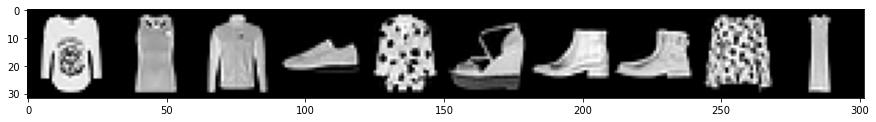

In [7]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

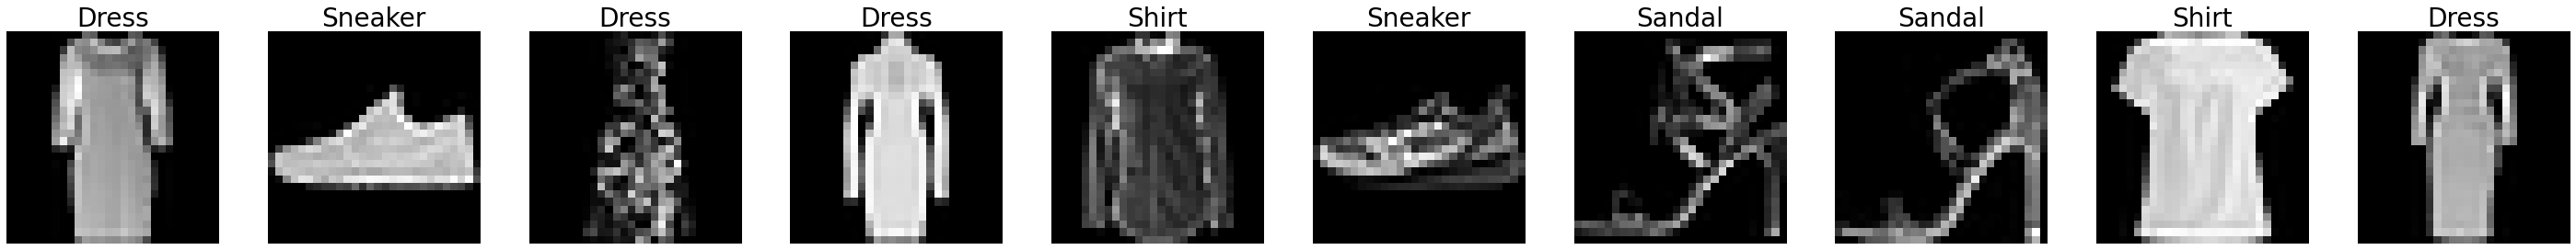

In [8]:
how_many_to_plot = 10

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

In [23]:
class FNet(nn.Module):
    def __init__(self):
        super().__init__()
        """self.conv1 = nn.Conv2d(1,6,5)
        #self.bn1 = nn.BatchNorm2d(6)

        self.conv2 = nn.Conv2d(6,12,5)
        #self.bn2 = nn.BatchNorm2d(12)

        self.fc1 = nn.Linear(12*4*4,120)
        self.fc2 = nn.Linear(120,60)
        self.out = nn.Linear(60,10)
        """
        # Only linear net
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()
        self.fc01 = nn.Linear(784,392)
        self.fc02 = nn.Linear(392,196)
        self.fc03 = nn.Linear(196,98)
        self.fc04 = nn.Linear(98,49)
        self.fc05 = nn.Linear(49,24)
        self.fc06 = nn.Linear(24,10)
    

    def forward(self,x):
        """x=self.conv1(x)
        #x=self.bn1(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2,2)
        
        x=self.conv2(x)
        #x=self.bn2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2,2)

        x=x.reshape(-1,12*4*4)
        x=self.fc1(x)
        x=F.relu(x)

        x=self.fc2(x)
        x=F.relu(x)

        x=self.out(x)
        #x=F.relu(x)"""
        x = self.flatten(x)
        x=self.relu(self.fc01(x))
        x=self.relu(self.fc02(x))
        x=self.relu(self.fc03(x))
        x=self.relu(self.fc04(x))
        x=self.relu(self.fc05(x))
        x=self.relu(self.fc06(x))
        return x
        

In [24]:
network = FNet()
print(network)

FNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (fc01): Linear(in_features=784, out_features=392, bias=True)
  (fc02): Linear(in_features=392, out_features=196, bias=True)
  (fc03): Linear(in_features=196, out_features=98, bias=True)
  (fc04): Linear(in_features=98, out_features=49, bias=True)
  (fc05): Linear(in_features=49, out_features=24, bias=True)
  (fc06): Linear(in_features=24, out_features=10, bias=True)
)


In [25]:
def get_correct_sum(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [28]:
optimizer = optim.Adam(network.parameters())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)


In [45]:
def test(dataloader,network):

    network.eval()
    total_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            preds = network(images)
            loss = F.cross_entropy(preds,labels)
            total_loss += loss.item()
            total_correct += preds.argmax(dim=1).eq(labels).sum().item()

    size = len(dataloader.dataset)
    print("Test Accuracy:%.2f Total loss:%.7f"%(total_correct/size*100,total_loss/size))
    return total_correct/size*100

In [50]:
epochs = 50
train_acc=[]
loss_lst=[]
test_acc = []
for epoch in range(epochs):
    total_loss = 0
    total_correct = 0
    size = len(train_loader.dataset)
    for batch in iter(train_loader):
        images, labels = batch
        
        preds = network(images)
        
        loss = F.cross_entropy(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_correct_sum(preds, labels)
    
    print("Epoch:%d Train Accuracy:%.2f  Total loss:%.7f"%(epoch,total_correct/size*100,total_loss/size))
    train_acc.append(total_correct/size*100)
    loss_lst.append(total_loss/size)
    test_acc.append(test(test_loader, network))

Epoch:0 Train Accuracy:95.77  Total loss:0.0010922
Test Accuracy:88.46 Total loss:0.0046261
Epoch:1 Train Accuracy:96.10  Total loss:0.0010214
Test Accuracy:89.10 Total loss:0.0048436
Epoch:2 Train Accuracy:96.12  Total loss:0.0010110
Test Accuracy:89.35 Total loss:0.0045981
Epoch:3 Train Accuracy:96.20  Total loss:0.0009853
Test Accuracy:88.77 Total loss:0.0050341
Epoch:4 Train Accuracy:96.22  Total loss:0.0009895
Test Accuracy:89.26 Total loss:0.0045758
Epoch:5 Train Accuracy:96.53  Total loss:0.0009485
Test Accuracy:89.43 Total loss:0.0047811
Epoch:6 Train Accuracy:96.45  Total loss:0.0009403
Test Accuracy:88.89 Total loss:0.0050657
Epoch:7 Train Accuracy:96.56  Total loss:0.0008859
Test Accuracy:89.01 Total loss:0.0048234
Epoch:8 Train Accuracy:96.56  Total loss:0.0009109
Test Accuracy:89.08 Total loss:0.0049385
Epoch:9 Train Accuracy:96.74  Total loss:0.0008503
Test Accuracy:89.31 Total loss:0.0052960
Epoch:10 Train Accuracy:96.73  Total loss:0.0008501
Test Accuracy:88.93 Total lo

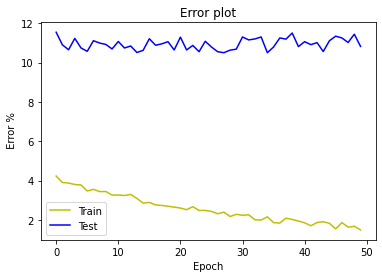

In [51]:
plt.plot(100-np.array(train_acc),'y')
plt.plot(100-np.array(test_acc),'b')
plt.xlabel('Epoch')
plt.ylabel(' Error %')
plt.legend(['Train','Test'])
plt.title('Error plot')
plt.show()